In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import graphviz
import matplotlib.pyplot as plt

In [2]:
file = "dataset_44_spambase.csv"
data = pd.read_csv(file, header=0)

data.columns = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_%3B","char_freq_%28","char_freq_%5B","char_freq_%21","char_freq_%24","char_freq_%23","capital_run_length_average","capital_run_length_longest","capital_run_length_total","class"]
feature_names = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_%3B","char_freq_%28","char_freq_%5B","char_freq_%21","char_freq_%24","char_freq_%23","capital_run_length_average","capital_run_length_longest","capital_run_length_total"]
label_name = ["class"]
print(len(data), len(data.columns))
data.head()
print(data.columns)

data_features = data
data_features = data_features.drop(labels='class',axis=1)
data_label = data['class']


4601 58
Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_confe

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, ShuffleSplit
x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=0.3, random_state=3, shuffle=False)

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

In [4]:
def plot_graph(param, scores, title="", param_name="", x_range=(1,100), y_range=(0.5,1)):
    plt.figure()
    l_train, = plt.plot(param, scores[0,:],ls='-', marker='o' , color='blue')
    l_test, = plt.plot(param, scores[1,:],ls='-', marker='*', color='red')
    l_cv, = plt.plot(param, scores[2,:], ls='-', marker='+', color='green')
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.xlabel(param_name)
    plt.ylabel('accuracy')
    plt.title=title
    
    plt.legend(handles=[l_train, l_test, l_cv],labels=['train', 'test', 'validation'], loc='best')
    
    plt.show()

def plot_xticks_graph(param, scores, title="", x_names=[], y_range=(0.5,1)):
    plt.figure()
    l_train, = plt.plot(param, scores[0,:],ls='-', marker='o' , color='blue')
    l_test, = plt.plot(param, scores[1,:],ls='-', marker='*', color='red')
    l_cv, = plt.plot(param, scores[2,:], ls='-', marker='+', color='green')
    
    x_length = range(len(x_names))
    plt.ylim(y_range)
    plt.xticks(x_length, x_names, rotation=45)
    plt.ylabel('accuracy')
    plt.title=title
    
    plt.legend(handles=[l_train, l_test, l_cv],labels=['train', 'test', 'validation'], loc='best')
    
    plt.show()

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit

def decision_tree(splits=0.3, depth=None, features=None, minssplit=2, minsleaf=1,maxleafnodes=None):
    x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=splits, random_state=3, shuffle=False)

    clf = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=depth, max_features=features, min_samples_split=minssplit, min_samples_leaf=minsleaf, max_leaf_nodes=maxleafnodes)
    clf = clf.fit(x_train, y_train)
    
    score = np.zeros((1,3))
    score[0,0] = clf.score(x_train, y_train)
    score[0,1] = clf.score(x_test, y_test)
    cv = ShuffleSplit()
    cv_scores = cross_val_score(clf, x_train, y_train, cv=cv)
    
    score[0,2] = cv_scores.mean()
    
    print(score)
    
    return score

[[0.94468599 0.76138829 0.92439614]]
[[0.93940217 0.78935939 0.92038043]]
[[0.93726708 0.83417813 0.91521739]]
[[0.9557971  0.78924498 0.93695652]]
[[0.96956522 0.71881791 0.94043478]]
[[0.99565217 0.35820355 0.99076087]]
[[1.        0.1344303 1.       ]]
[[1.         0.24259712 1.        ]]
[[1.         0.32673267 1.        ]]
[[1.         0.38792536 1.        ]]


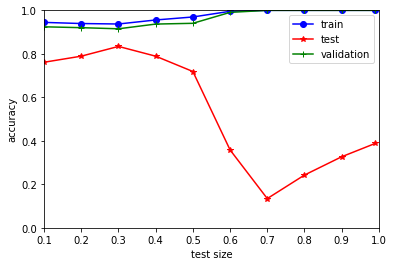

In [60]:
score_splits = np.zeros((3, 10))
for i in range(10):
    score_splits[:,i] = decision_tree(depth=6, splits=test_sizes[i])
plot_graph(param=test_sizes, scores=score_splits, param_name='test size', x_range=(0.1,1), y_range=(0,1))

[[0.89021739 0.7155266  0.87554348]]
[[0.90733696 0.84907709 0.89918478]]
[[0.93940217 0.79153094 0.91820652]]
[[0.9548913  0.79478827 0.92201087]]
[[0.96684783 0.80021716 0.92309783]]
[[0.98369565 0.7752443  0.92690217]]
[[0.98777174 0.76655809 0.93206522]]
[[0.98967391 0.72747014 0.92418478]]
[[0.99565217 0.7339848  0.92418478]]
[[0.99918478 0.6970684  0.92201087]]


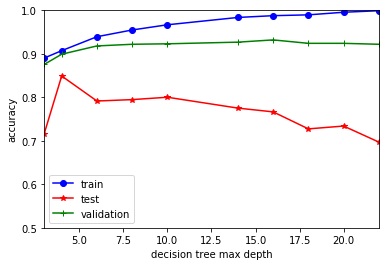

In [61]:
max_depth_input = [3,4,6,8,10,14,16,18,20,None]
max_depth_output = [3,4,6,8,10,14,16,18,20,22]
scores_depth = np.zeros((3, 10))
for i in range(10):
    scores_depth[:,i] = decision_tree(depth=max_depth_input[i], splits=0.2)
plot_graph(param=max_depth_output, scores=scores_depth, param_name='decision tree max depth',x_range=(3,22))

[[0.89596273 0.75452571 0.88695652]]
[[0.92267081 0.75742216 0.89596273]]
[[0.90838509 0.74366401 0.89130435]]
[[0.91273292 0.72845764 0.89161491]]
[[0.9173913  0.74149167 0.90372671]]
[[0.91055901 0.81390297 0.89968944]]
[[0.9068323  0.81752353 0.89968944]]
[[0.91055901 0.81535119 0.9       ]]
[[0.91055901 0.81390297 0.90279503]]
[[0.91055901 0.81535119 0.89689441]]


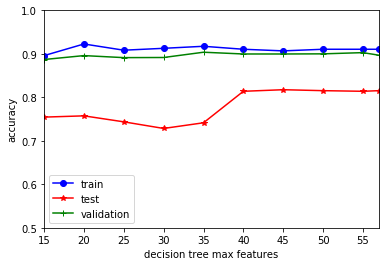

In [62]:
max_features = [15,20,25,30,35,40,45,50,55,57] 
scores_max_features = np.zeros((3, 10))
for i in range(10):
    scores_max_features[:,i] = decision_tree(depth=4, features=max_features[i])
plot_graph(param=max_features, scores=scores_max_features, param_name='decision tree max features',x_range=(15,57))

[[0.88695652 0.7595945  0.88695652]]
[[0.89068323 0.71469949 0.88571429]]
[[0.89875776 0.71614772 0.89378882]]
[[0.90776398 0.81535119 0.90652174]]
[[0.91552795 0.86169442 0.9068323 ]]
[[0.91987578 0.87400434 0.90652174]]
[[0.92236025 0.87545257 0.90931677]]
[[0.92391304 0.87038378 0.90403727]]
[[0.92546584 0.87183201 0.9068323 ]]
[[0.92546584 0.87183201 0.90900621]]


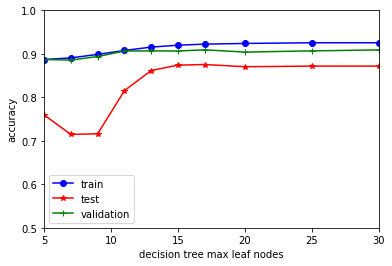

In [63]:
max_leaf_nodes = [5,7,9,11,13,15,17,20,25,30] 
score_max_leaf_nodes = np.zeros((3, 10))
for i in range(10):
    score_max_leaf_nodes[:,i] = decision_tree(splits=0.3, depth=5, maxleafnodes=max_leaf_nodes[i])
plot_graph(param=max_leaf_nodes, scores=score_max_leaf_nodes, param_name='decision tree max leaf nodes',x_range=(5,30))

In [53]:
from sklearn.neighbors import KNeighborsClassifier

def knneighbors(splits=0.3, neighbors=5):
    x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=splits, random_state=3, shuffle=False)
    
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn = knn.fit(x_train, y_train)
    
    score = np.zeros((1,3))
    score[0,0] = knn.score(x_train, y_train)
    score[0,1] = knn.score(x_test, y_test)
    cv = ShuffleSplit()
    cv_scores = cross_val_score(knn, x_train, y_train, cv=cv)
    
    score[0,2] = cv_scores.mean()
    
    print(score)
    
    return score

[[0.99927536 0.68546638 0.82077295]]
[[0.91859903 0.80043384 0.81231884]]
[[0.90434783 0.64425163 0.81207729]]
[[0.88309179 0.75704989 0.79903382]]
[[0.86980676 0.67245119 0.81231884]]
[[0.85748792 0.670282   0.79758454]]
[[0.83550725 0.67678959 0.79879227]]
[[0.82125604 0.67678959 0.78381643]]
[[0.80603865 0.69197397 0.77922705]]
[[0.78888889 0.68763557 0.77101449]]


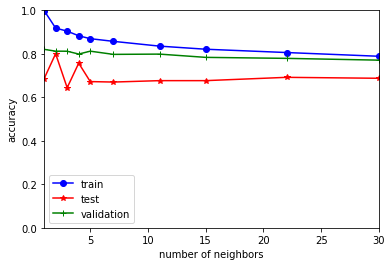

In [55]:
nb_neighbors = [1,2,3,4,5,7,11,15,22,30]
scores_nb_neighbors = np.zeros((3, 10))
for i in range(10):
    scores_nb_neighbors[:,i] = knneighbors(neighbors=nb_neighbors[i],splits=0.3)
plot_graph(param=nb_neighbors, scores=scores_nb_neighbors, param_name='number of neighbors',x_range=(1,30), y_range=(0,1))

[[0.86980676 0.67245119 0.81835749]]
[[0.86983696 0.70792617 0.8       ]]
[[0.86428571 0.70311369 0.79906832]]
[[0.86811594 0.64801738 0.79927536]]
[[0.89391304 0.48413733 0.84826087]]
[[0.98586957 0.03730532 0.98423913]]
[[1.        0.1344303 1.       ]]
[[1.         0.24259712 1.        ]]
[[1.         0.32673267 1.        ]]
[[1.         0.38792536 1.        ]]


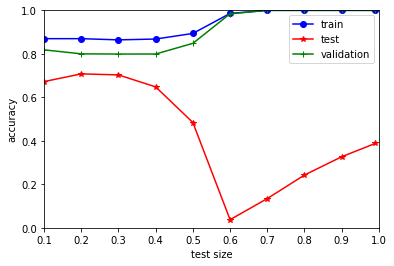

In [69]:
scores_n_neighbors_splits = np.zeros((3, 10))
for i in range(10):
    scores_n_neighbors_splits[:,i] = knneighbors(split=test_sizes[i])
plot_graph(param=test_sizes, scores=scores_n_neighbors_splits, param_name='test size',x_range=(0.1,1), y_range=(0,1))

In [59]:
from sklearn.neural_network import MLPClassifier
def nn_mlp(splits=0.3, hls=5,slv='adam', actv='logistic',lr_init=0.1, randst=100):
    x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=splits, random_state=3, shuffle=False)

    mlp = MLPClassifier(hidden_layer_sizes=(hls,), solver=slv, activation=actv, learning_rate_init=lr_init, random_state=randst)
    mlp.fit(x_train, y_train)
    
    score = np.zeros((1,3))
    score[0,0] = mlp.score(x_train, y_train)
    score[0,1] = mlp.score(x_test, y_test)
    cv = ShuffleSplit()
    cv_scores = cross_val_score(mlp, x_train, y_train, cv=cv)
    
    score[0,2] = cv_scores.mean()
    print(score)
    
    return score

[[0.85248447 0.61332368 0.88571429]]
[[0.91086957 0.7487328  0.89192547]]
[[0.90062112 0.8660391  0.9052795 ]]
[[0.68198758 0.92831282 0.89751553]]
[[0.90465839 0.72483707 0.85962733]]
[[0.88385093 0.82910934 0.90931677]]
[[0.9015528  0.66256336 0.88726708]]
[[0.8552795  0.7096307  0.88913043]]
[[0.87919255 0.75814627 0.8431677 ]]
[[0.93447205 0.80376539 0.88726708]]


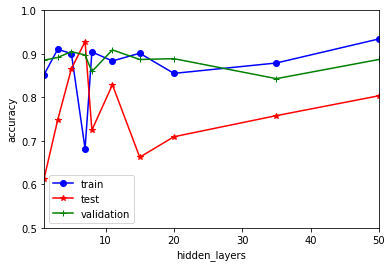

In [62]:
hidden_layers = [1,3,5,7,8,11,15,20,35,50] 
scores_hidden_layers = np.zeros((3, 10))
for i in range(10):
    scores_hidden_layers[:,i] = nn_mlp(hls=hidden_layers[i])
plot_graph(param=hidden_layers, scores=scores_hidden_layers, param_name='hidden_layers',x_range=(1,50))

[[0.91400966 0.59219089 0.87729469]]
[[0.84538043 0.54505972 0.8986413 ]]
[[0.68198758 0.92831282 0.87795031]]
[[0.92572464 0.7148289  0.9057971 ]]
[[0.90043478 0.51847023 0.88434783]]
[[0.99293478 0.17964506 0.98967391]]
[[1.        0.1344303 1.       ]]
[[1.         0.24259712 1.        ]]
[[1.         0.32673267 1.        ]]
[[1.         0.38792536 1.        ]]


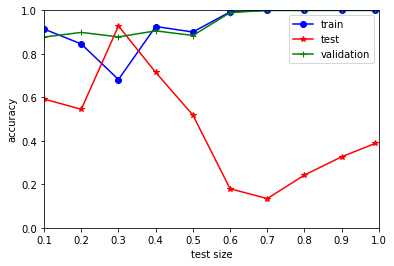

In [64]:
scores_nn_mlp_split = np.zeros((3, 10))
for i in range(10):
    scores_nn_mlp_split[:,i] = nn_mlp(splits=test_sizes[i],hls=7)
plot_graph(param=test_sizes, scores=scores_nn_mlp_split, param_name='test size',x_range=(0.1,1), y_range=(0,1))

In [5]:
from sklearn.svm import SVC

def svm_svc(splits=0.3, kn='rbf'):
    x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=splits, random_state=3, shuffle=False)

    svc = SVC(kernel=kn, gamma='auto')
    svc.fit(x_train, y_train)
    
    score = np.zeros((1,3))
    score[0,0] = svc.score(x_train, y_train)
    score[0,1] = svc.score(x_test, y_test)
    cv = ShuffleSplit()
    cv_scores = cross_val_score(svc, x_train, y_train, cv=cv)
    
    score[0,2] = cv_scores.mean()
    
    print(score)
    
    return score

[[0.94813665 0.6980449  0.83167702]]
[[0.56304348 0.         0.5742236 ]]


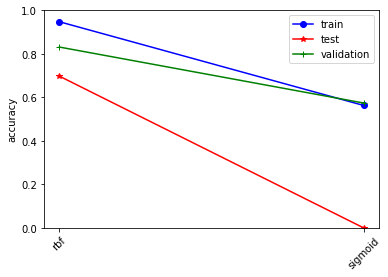

In [8]:
kernel_svc = ['rbf','sigmoid']
scores_kernel_svc = np.zeros((3, 2))
for i in range(2):
    scores_kernel_svc[:,i] = svm_svc(kn=kernel_svc[i])
plot_xticks_graph(param=kernel_svc, scores=scores_kernel_svc, x_names=kernel_svc, y_range=(0,1))

[[0.95       0.65292842 0.84516908]]
[[0.94891304 0.6970684  0.83505435]]
[[0.94813665 0.6980449  0.83229814]]
[[0.93913043 0.61053775 0.83913043]]
[[0.94130435 0.4315515  0.88913043]]
[[0.98858696 0.00108656 0.98478261]]


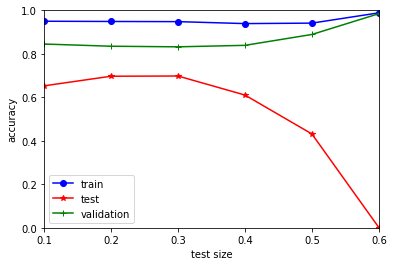

In [12]:
scores_svc_size = np.zeros((3, 6))
for i in range(6):
    scores_svc_size[:,i] = svm_svc(splits=test_sizes[i])
plot_graph(param=[0.1,0.2,0.3,0.4,0.5,0.6], scores=scores_svc_size, param_name='test size',x_range=(0.1,0.6), y_range=(0,1))

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def ada_boosting(splits=0.3, nestim=50, lr=1.):
    x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=splits, random_state=3, shuffle=False)

    boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,max_features=50),n_estimators=nestim, learning_rate=lr)
    boost.fit(x_train, y_train)
    
    score = np.zeros((1,3))
    score[0,0] = boost.score(x_train, y_train)
    score[0,1] = boost.score(x_test, y_test)
    cv = ShuffleSplit()
    cv_scores = cross_val_score(boost, x_train, y_train, cv=cv)
    
    score[0,2] = cv_scores.mean()
    
    print(score)
    
    return score

[[0.87919255 0.74149167 0.87391304]]
[[0.8931677  0.75597393 0.88913043]]
[[0.88913043 0.73859522 0.90807453]]
[[0.92453416 0.80666184 0.92391304]]
[[0.94254658 0.83055757 0.94161491]]
[[0.9431677  0.82476466 0.93819876]]
[[0.95093168 0.78276611 0.9326087 ]]
[[0.94813665 0.82910934 0.93975155]]
[[0.95403727 0.82404055 0.93509317]]
[[0.95776398 0.75814627 0.95031056]]


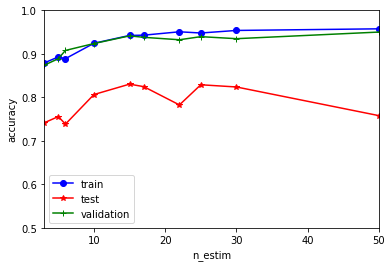

In [47]:
n_estim = [3,5,6,10,15,17,22,25,30,50] 
scores_n_estim = np.zeros((3, 10))
for i in range(10):
    scores_n_estim[:,i] = ada_boosting(nestim=n_estim[i])
plot_graph(param=n_estim, scores=scores_n_estim, param_name='n_estim',x_range=(3,50))

[[0.9263285  0.74186551 0.9294686 ]]
[[0.93940217 0.74701412 0.92690217]]
[[0.94254658 0.83055757 0.93726708]]
[[0.92862319 0.81966323 0.93369565]]
[[0.95869565 0.71534116 0.96130435]]
[[0.9951087  0.34407823 0.98532609]]
[[1.        0.1344303 1.       ]]
[[1.         0.24259712 1.        ]]
[[1.         0.32673267 1.        ]]
[[1.         0.38792536 1.        ]]


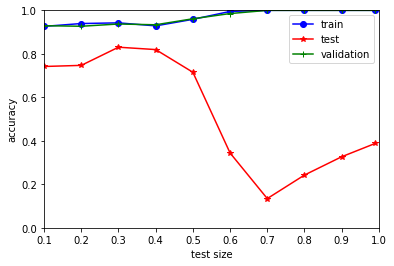

In [8]:
scores_adabost_split = np.zeros((3, 10))
for i in range(10):
    scores_adabost_split[:,i] = ada_boosting(splits=test_sizes[i],nestim=15)
plot_graph(param=test_sizes, scores=scores_adabost_split, param_name='test size',x_range=(0.1,1), y_range=(0,1))